In [1]:
import pandas as pd

In [2]:
resenha = pd.read_csv('../input/imdb-ptbr/imdb-reviews-pt-br.csv')

In [3]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
print('Negativa \n')
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [5]:
print('Positivo \n')
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [6]:
print(resenha['sentiment'].value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [7]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])
resenha['classificacao'] = classificacao
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
def classificar_texto(texto,coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    print(bag_of_words.shape)
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, 'text_pt', 'classificacao'))

(49459, 50)
0.6583097452486858


In [10]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

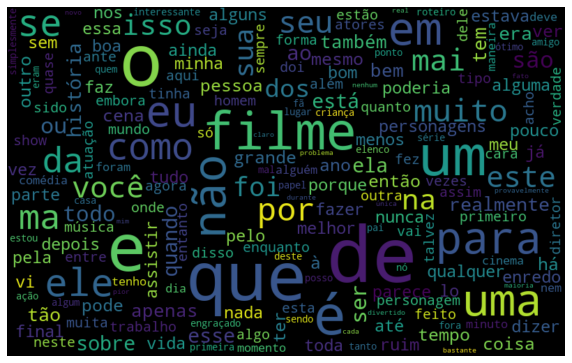

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
def nuvem_de_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, 
                                  collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_de_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [13]:
def nuvem_de_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, 
                                  collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_de_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

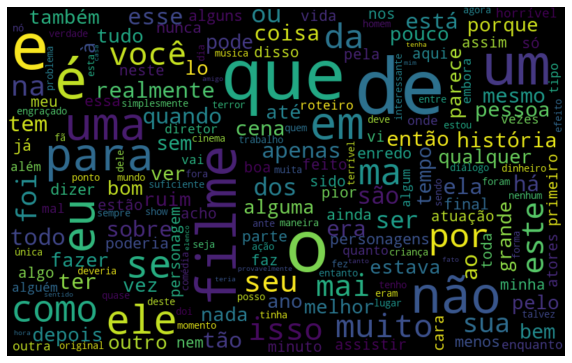

In [14]:
nuvem_de_palavras_neg(resenha, 'text_pt')

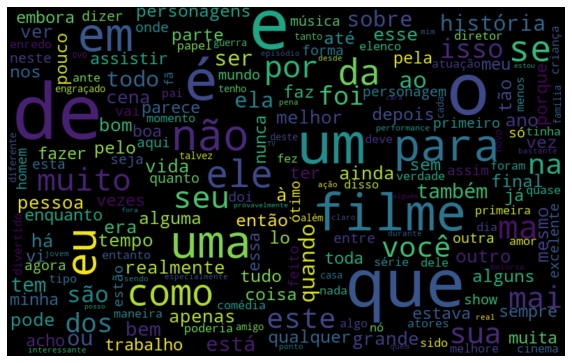

In [15]:
nuvem_de_palavras_pos(resenha, 'text_pt')

In [16]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...


True

In [17]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "frequencia": list(frequencia.values())})
df_frequencia.head()

,Palavra,frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [18]:
df_frequencia.nlargest(columns='frequencia', n=10)

,Palavra,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [19]:
import seaborn as sns

In [20]:
def Pareto(texto, coluna_texto, quantidade):  
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "frequencia": list(frequencia.values())})
    df_frequencia.head()
    df_frequencia_top = df_frequencia.nlargest(columns='frequencia', n=quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencia_top, x='Palavra', y='frequencia', color='green')
    ax.set(ylabel='Contagem')
    plt.show()

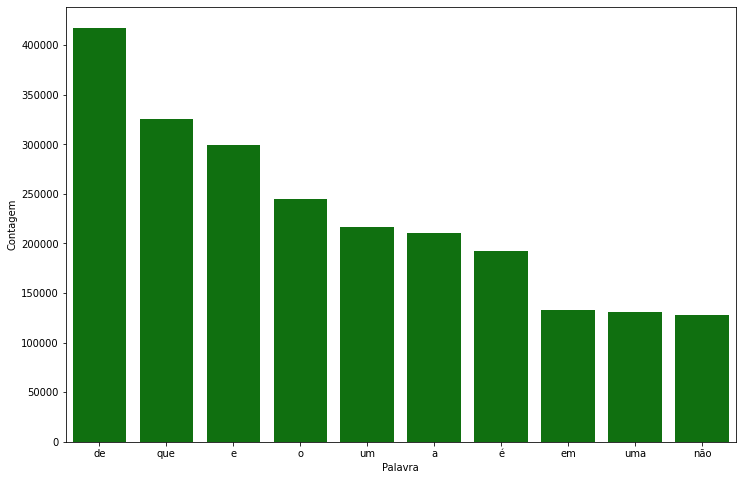

In [21]:
Pareto(resenha, 'text_pt', 10)

In [22]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [23]:
frase_processada = list()
for opiniao in resenha['text_pt']:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_1'] = frase_processada

In [24]:
resenha.head(10)

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg,0,Uma coisa engraçada aconteceu comigo enquanto ...
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg,0,Este filme terror alemão ser estranhos vi. Eu ...
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg,0,"Sendo fã longa data cinema japonês, esperava i..."
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg,0,"""Tokyo Eyes"" fala menina japonesa 17 anos cai ..."
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg,0,Fazendeiros ricos Buenos Aires têm longa polít...


In [25]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

(49459, 50)


0.6607359482410028

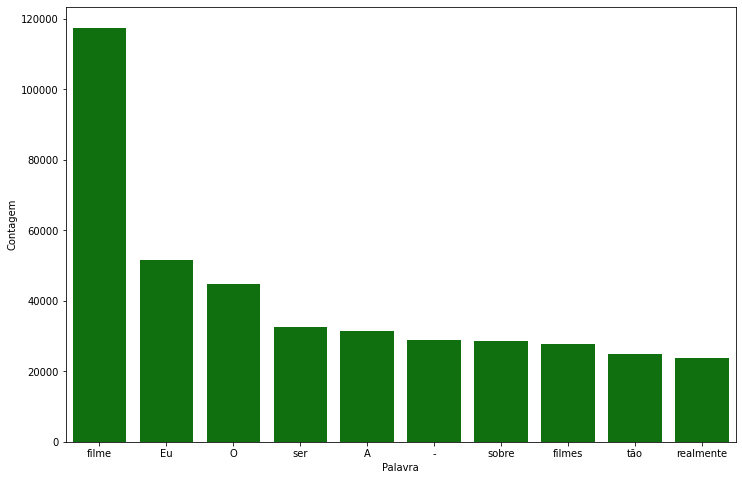

In [26]:
Pareto(resenha, 'tratamento_1', 10)

In [27]:
from nltk import tokenize
token_pontuacao = tokenize.WordPunctTokenizer()

In [28]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [29]:
pontuacao_stop_words = pontuacao+palavras_irrelevantes
frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stop_words:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

In [30]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [31]:
classificar_texto(resenha, 'tratamento_2', 'classificacao')

(49459, 50)


0.681196926809543

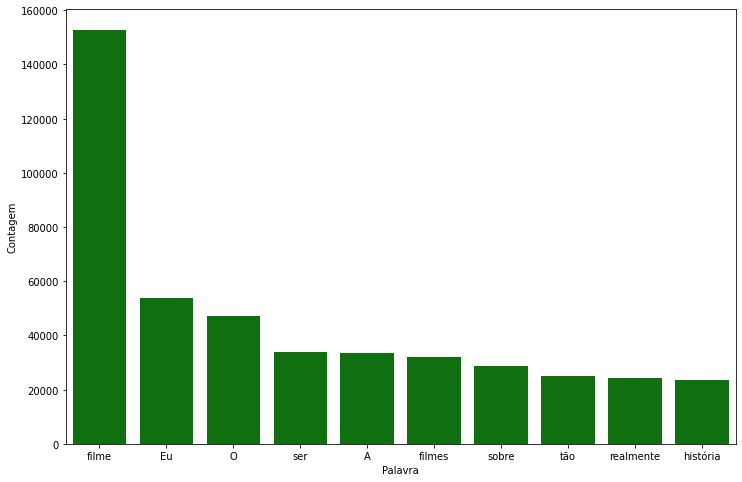

In [32]:
Pareto(resenha, 'tratamento_2', 10)

In [33]:
import unidecode
sem_acento = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [34]:
stop_words_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stop_words]

In [35]:
frase_processada = list()
for opiniao in sem_acento:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada

In [36]:
acuracia_tratamento_3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')
print(acuracia_tratamento_3)

(49459, 50)
0.6810351799433886


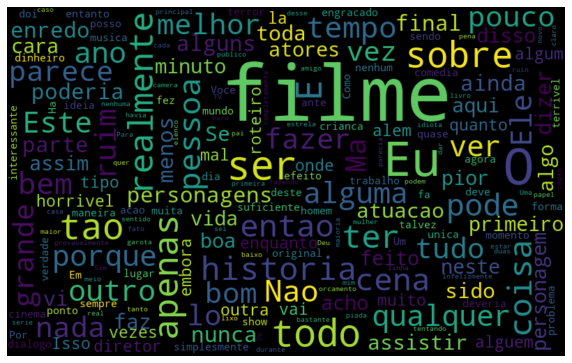

In [37]:
nuvem_de_palavras_neg(resenha, 'tratamento_3')

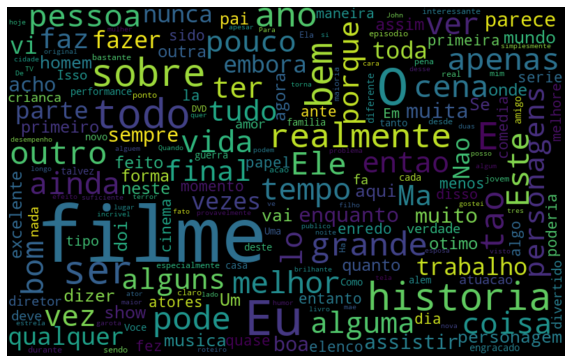

In [38]:
nuvem_de_palavras_pos(resenha, 'tratamento_3')

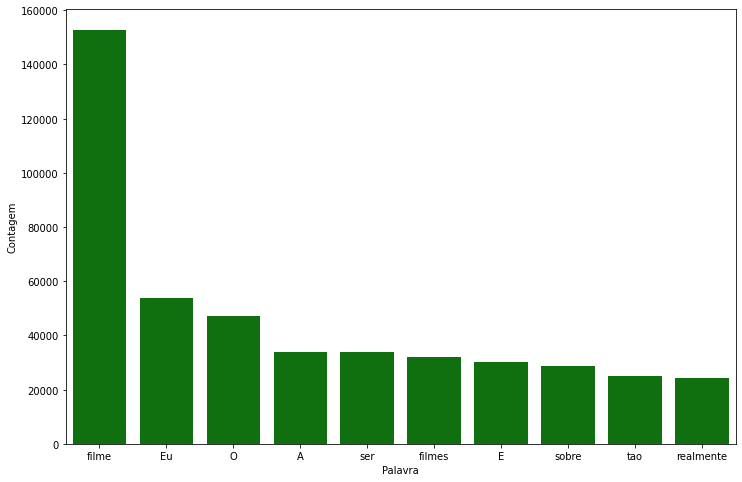

In [39]:
Pareto(resenha, 'tratamento_3', 10)

In [40]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [41]:
acuracia_tratamento_4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')
print(acuracia_tratamento_4)
print(acuracia_tratamento_3)

(49459, 50)
0.6879094217549535
0.6810351799433886


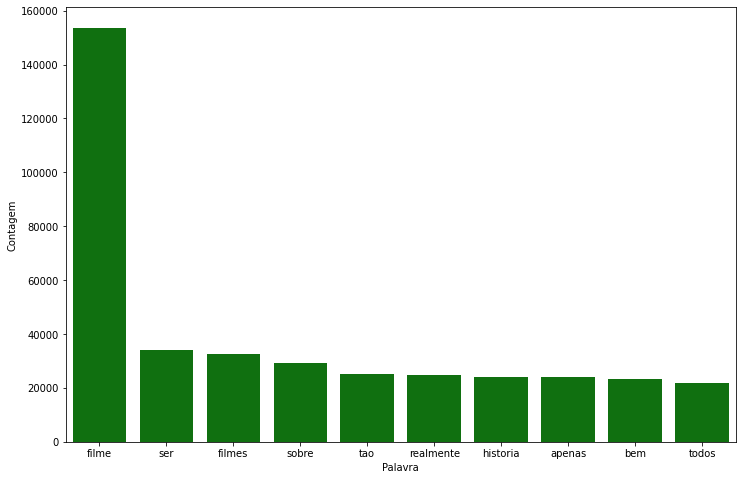

In [42]:
Pareto(resenha, 'tratamento_4', 10)

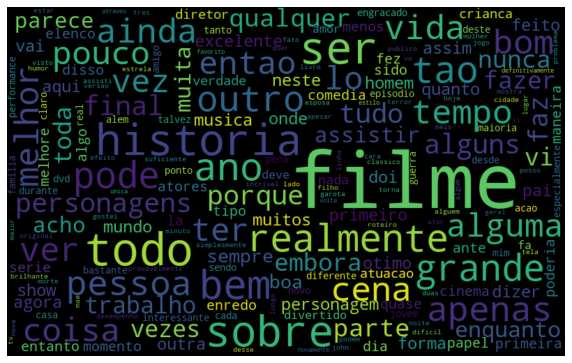

In [43]:
nuvem_de_palavras_pos(resenha, 'tratamento_4')

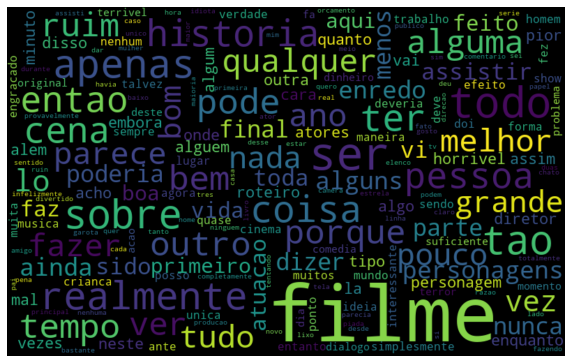

In [44]:
nuvem_de_palavras_neg(resenha, 'tratamento_4')

In [45]:
stemmer = nltk.RSLPStemmer()

In [46]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [47]:
acuracia_tratamento_5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')
print(acuracia_tratamento_4)
print(acuracia_tratamento_5)

(49459, 50)
0.6879094217549535
0.6943792964011323


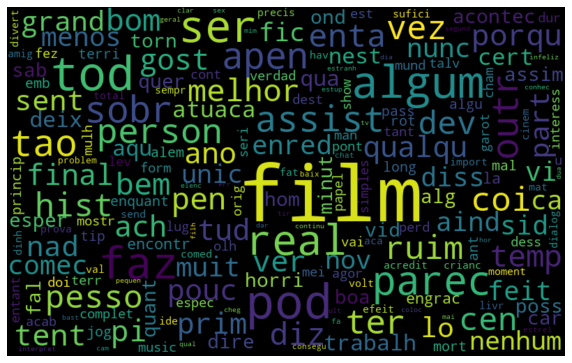

In [48]:
nuvem_de_palavras_neg(resenha, 'tratamento_5')

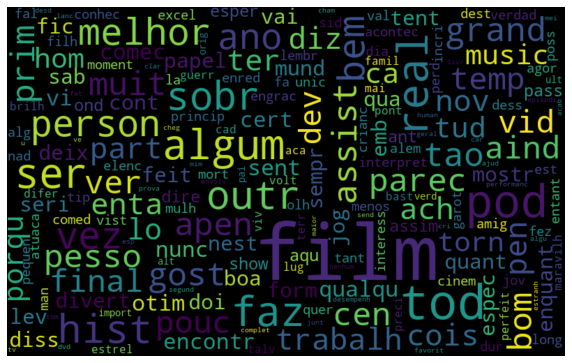

In [49]:
nuvem_de_palavras_pos(resenha, 'tratamento_5')

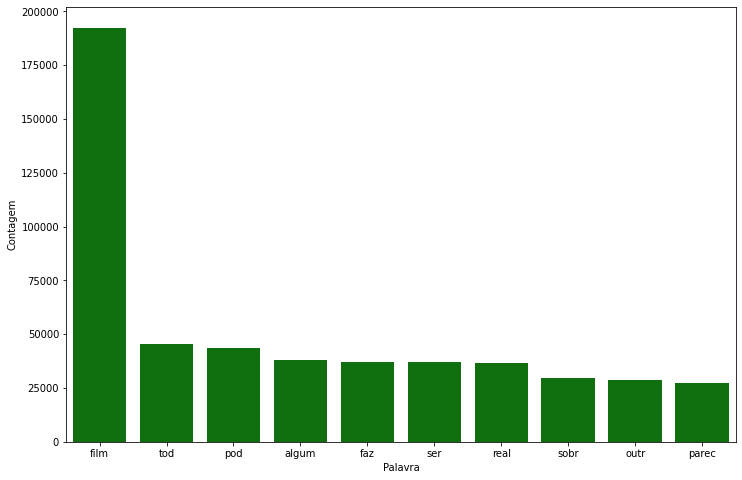

In [50]:
Pareto(resenha, 'tratamento_5', 10)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
Tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [53]:
tfidef_bruto = Tfidf.fit_transform(resenha['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidef_bruto, resenha['classificacao'], 
                                                              random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)

acuracia_tfidef_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidef_bruto)

0.6600889607763849


In [54]:
tfidef_tratados = Tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidef_tratados, resenha['classificacao'], 
                                                              random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)

acuracia_tfidef_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidef_bruto)

0.6988273352203801


In [55]:
from nltk import ngrams

In [56]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'],
                                                              random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)


0.8858875859280226


In [57]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'],
                                                              random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8841892438334007


In [58]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)
pesos.nlargest(10, 0)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
otim,8.290468
excel,7.978024
perfeit,6.578863
favorit,5.778017
maravilh,5.286499
incri,5.049495
hilari,4.653808
divert,4.579568
ador,4.422221
brilh,4.268573


In [59]:
pesos.nsmallest(10,0)

,0
pi,-9.175692
ruim,-9.169709
horri,-8.751669
terri,-7.186906
chat,-6.919293
nad,-6.029852
infeliz,-5.310523
decepca,-4.995835
ridicul,-4.950823
nenhum,-4.918829


In [60]:
pesos.nlargest(50, 0)

,0
otim,8.290468
excel,7.978024
perfeit,6.578863
favorit,5.778017
maravilh,5.286499
incri,5.049495
hilari,4.653808
divert,4.579568
ador,4.422221
brilh,4.268573
